# Project 1
## Cardiovascular Disease and Risk Factors
### Team 6
* Andrew Sooklall
* Varun Athreya
* Robert Mendoza
* Zane Lynch
* Guisha Ceus



In [1]:
#import dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint

#import extras
import requests
from scipy.stats import linregress
import time

# #import api
# import gmaps

# # Import API key
# from config import weather_api_key

In [2]:
#import CSV(s)
base_df = pd.read_csv("Resources/cvd_per_100k.csv")
base_df

,Location,Male Deaths,Female Deaths,Total Deaths,Cigarette Users,Hypertension,Obesity
0,Alabama,283.0,175.5,458.5,20900,41900,37100
1,Alaska,172.5,99.4,271.9,21000,31800,34700
2,Arizona,178.4,109.8,288.2,15600,30700,30100
3,Arkansas,277.8,178.9,456.7,22300,41300,36000
4,California,181.2,111.4,292.6,11300,28400,25700
5,Colorado,153.1,97.4,250.5,14600,25900,23100
6,Connecticut,178.5,113.4,291.9,12700,30500,27500
7,Delaware,197.1,127.3,324.4,17000,34900,32400
8,District of Columbia,243.5,149.2,392.7,14300,26700,23000
9,Florida,186.2,111.6,297.8,16100,34600,28900


In [10]:
#create a dataframe 
#cig x
#total deaths y
# loc[ rows, columns ]
data=base_df.loc[:, ["Total Deaths", "Cigarette Users"]]
# data= pd.DataFrame(data,columns=['Total Deaths',"Cigarette Users"])
data.head()

,Total Deaths,Cigarette Users
0,458.5,20900
1,271.9,21000
2,288.2,15600
3,456.7,22300
4,292.6,11300


In [11]:
data.count

<bound method DataFrame.count of     Total Deaths  Cigarette Users
0          458.5            20900
1          271.9            21000
2          288.2            15600
3          456.7            22300
4          292.6            11300
5          250.5            14600
6          291.9            12700
7          324.4            17000
8          392.7            14300
9          297.8            16100
10         362.8            17500
11         266.6            12800
12         330.9            14300
13         336.3            15500
14         377.6            21800
15         344.6            17100
16         323.4            17400
17         401.7            24600
18         441.1            23100
19         294.9            17300
20         339.1            13800
21         280.8            13700
22         401.6            19300
23         245.3            14500
24         476.1            22200
25         392.8            20800
26         315.0            17200
27         306.

In [18]:
#cig_deaths=data

Text(0, 0.5, 'Total Deaths')

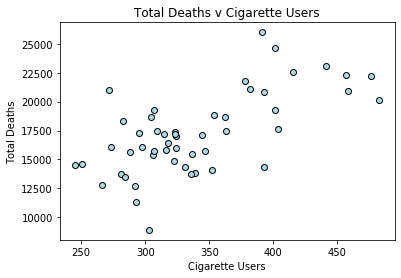

In [19]:
#create plot 
plt.scatter(data["Total Deaths"],data["Cigarette Users"], c="lightblue", edgecolor="black")
plt.title("Total Deaths v Cigarette Users")
plt.xlabel("Cigarette Users")
plt.ylabel("Total Deaths")

In [ ]:
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept